#  유방암 데이터 셋을 차원축소하기

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
cancer.target[:50] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1])

In [5]:
# malignant = 악성 , benign = 양성
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

### 정규화

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cancer_std = scaler.fit_transform(cancer.data)

### PCA 변환(10,5,2개의 차원)

In [7]:
from sklearn.decomposition import PCA
pca_10 = PCA(n_components=10)
pca_5 = PCA(n_components=5)
pca_2 = PCA(n_components=2)

In [8]:
cancer_pca_10 = pca_10.fit_transform(cancer_std)
cancer_pca_5 = pca_5.fit_transform(cancer_std)
cancer_pca_2 = pca_2.fit_transform(cancer_std)

### 변환한 값 확인

In [9]:
cancer_pca_10[:1]

array([[ 9.19283683,  1.94858307, -1.12316616,  3.63373089, -1.19511014,
         1.41142451,  2.15936972, -0.39840843, -0.15712323, -0.87741002]])

In [10]:
cancer_pca_5[:1]

array([[ 9.19283683,  1.94858306, -1.12316627,  3.63372989, -1.1951098 ]])

In [34]:
cancer_pca_2[:1]

(2,)

### 분류 / 평가

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size = 0.2, random_state=2021
)
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train,y_train)
pred = dtc.predict(X_test)
acc1 = accuracy_score(y_test, pred)

In [47]:
def f_pca(X):
    X_train, X_test, y_train, y_test = train_test_split(
        X, cancer.target, stratify=cancer.target, test_size = 0.2, random_state=2021
    )
    dtc = DecisionTreeClassifier(random_state=2021)
    dtc.fit(X_train,y_train)
    pred = dtc.predict(X_test)
    acc = accuracy_score(y_test, pred)
    co = X.shape[1]


    print(f'{co}차원 PCA 변환의 정확도', round(acc,4))

In [55]:
cancer_list = [cancer_pca_10, cancer_pca_5, cancer_pca_2]
for can in cancer_list :
    f_pca(can)

print('차원변화를 하지 않은 정확도', round(acc1,4))

10차원 PCA 변환의 정확도 0.9912
5차원 PCA 변환의 정확도 0.9649
2차원 PCA 변환의 정확도 0.9211
차원변화를 하지 않은 정확도 0.8947


### 30차원 데이터의 정확도

In [15]:
pca_30 = PCA(n_components=30)
cancer_pca_30 = pca_30.fit_transform(cancer_std)
X_train, X_test, y_train, y_test = train_test_split(
    cancer_pca_30, cancer.target, stratify=cancer.target, test_size = 0.2, random_state=2021
)
dtc = DecisionTreeClassifier(random_state=2021)
dtc.fit(X_train,y_train)
pred = dtc.predict(X_test)
acc_30 = accuracy_score(y_test, pred)
print('30차원 PCA 변환의 정확도 :',  round(acc_30,4))

30차원 PCA 변환의 정확도 : 0.9474


### 2차원 데이터로 시각화 하기

In [16]:
cancer_pca_df = pd.DataFrame(cancer_pca_2, columns=['PC1','PC2'])
cancer_pca_df['target'] = cancer.target
cancer_pca_df.head()

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0


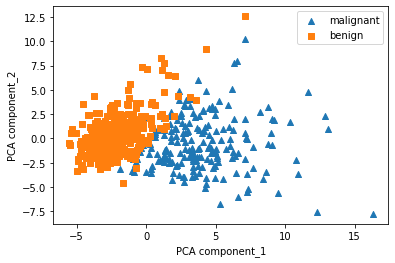

In [17]:
markers = ['^', 's']
for i, marker in enumerate(markers):
    x_axis_data = cancer_pca_df[cancer_pca_df['target'] == i]['PC1']
    y_axis_data = cancer_pca_df[cancer_pca_df['target'] == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=cancer.target_names[i])

plt.legend()
plt.xlabel('PCA component_1')
plt.ylabel('PCA component_2')
plt.show()